# Max likelihood

In [1]:
# imports
from importlib import reload

import pandas
import numpy as np
from scipy import special
import seaborn as sns
import mpmath
from matplotlib import pyplot as plt


# Generate a faux sample

## Let $E_{\rm max} = 10^{50}$ and $E_{\rm th} = 10^{40}$

In [2]:
gamma = -2.

In [3]:
NFRB = 100

In [4]:
lEmax = 50.
Emax = 10**lEmax

In [5]:
lEth = 40.
Eth = 10**lEth

In [6]:
norm = (Emax**(gamma+1) - Eth**(gamma+1))/(1+gamma)
norm

9.999999998999998e-41

In [7]:
randu = np.random.uniform(size=NFRB)

In [8]:
randE = (randu*(gamma+1)*norm + 10**(lEth*(gamma+1)))**(1/(1+gamma))

In [9]:
randE

array([1.36755309e+40, 4.98018080e+40, 1.01538927e+40, 3.81603457e+40,
       4.34695571e+40, 2.05684760e+40, 2.32612320e+40, 1.85030545e+40,
       6.55535738e+40, 4.88153420e+40, 1.22858068e+40, 1.91558110e+40,
       9.85189772e+40, 1.05799062e+40, 7.63650539e+40, 1.19077637e+40,
       1.08414428e+40, 1.25498119e+40, 1.16897269e+40, 1.18101524e+40,
       1.43563202e+41, 2.28943209e+40, 2.23696850e+40, 3.61342380e+40,
       1.74680966e+40, 1.22235148e+41, 2.36129255e+41, 1.24885097e+40,
       1.96028935e+40, 1.08770307e+40, 1.13379460e+40, 2.17739718e+40,
       2.56678681e+40, 2.21709281e+40, 1.72752401e+40, 3.24845181e+40,
       6.49985742e+40, 2.49632595e+40, 1.31344515e+41, 1.06823277e+40,
       1.00509854e+40, 1.10010564e+40, 2.55303156e+40, 1.00338388e+41,
       1.77041370e+40, 3.17098909e+40, 1.10049418e+40, 1.01052500e+40,
       7.85750351e+40, 1.13840710e+40, 2.46752308e+40, 8.50052317e+40,
       2.09924365e+40, 1.32711569e+42, 2.71379318e+40, 1.10724438e+40,
      

In [10]:
df = pandas.DataFrame()
df['E'] = randE
df['logE'] = np.log10(randE)

<AxesSubplot:xlabel='logE', ylabel='Count'>

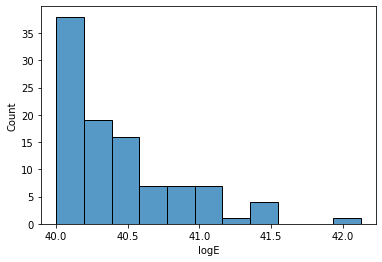

In [11]:
sns.histplot(data=df, x='logE')

# Max Likelihood Time!

## Methods

### We express the log-likelihood as 

## $\ln \mathcal{L} = - \int\limits_{E_{\rm th}}^{E_{\rm max}} p(E) dE + \sum\limits_{j=1}^N \ln p(E)$

### where $j$ is over all the $N$ FRBs and $p(E) = C E^\gamma$

## Likelihood terms

### This terms accounts for the total space explored.  It *decreases* with increasing Emax

In [12]:
def misses_term(C, Eth, Emax, gamma):
    return -C * (Emax**(gamma+1) - Eth**(gamma+1)) / (1+gamma)

### This term is simply proportional to the probability

In [13]:
def hit_term(Eval, C, gamma):
    NFRB = len(Eval)
    fterm = NFRB * np.log(C)
    sterm = gamma * np.sum(np.log(Eval))
    return fterm + sterm

In [14]:
def guess_C(gamma, Emax, Eth, NFRB):
    return NFRB * (gamma+1) / (Emax**(gamma+1) - Eth**(gamma+1))

## Test case $E_{max} = 10^{42}$

In [15]:
Emax = 1e42
#Eth = 1e40

In [16]:
guessC = guess_C(gamma, Emax, Eth, NFRB)
guessC

1.01010101010101e+42

In [17]:
logC = np.log10(guessC)
Cvals = 10**(np.linspace(logC-1, logC+1, 1000))

In [18]:
LL_C = misses_term(Cvals, Eth, Emax, gamma) + hit_term(df.E, Cvals, gamma)

<AxesSubplot:>

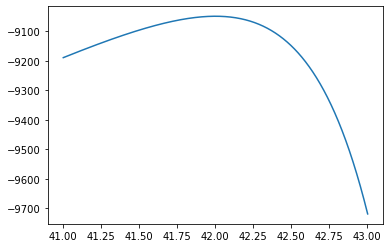

In [19]:
sns.lineplot(x=np.log10(Cvals), y=LL_C)

In [21]:
Cmax = Cvals[np.argmax(LL_C)]
Cmax

1.0077755194306342e+42

## Loop a bit

In [46]:
LLs = []
Emaxs = 10**(np.linspace(42., 47., 100))
Cmaxs = []

for Emax in Emaxs:
    guessC = guess_C(gamma, Emax, Eth, NFRB)
    logC = np.log10(guessC)
    Cvals = 10**(np.linspace(logC-1, logC+1, 1000))
    #
    misses = misses_term(Cvals, Eth, Emax, gamma) 
    hits = hit_term(df.E, Cvals, gamma)
    LL_C = misses + hits
    #print(guessC, Cvals[np.argmax(LL_C)])
    imax = np.argmax(LL_C)
    LLs.append(np.max(LL_C))
    Cmaxs.append(Cvals[imax])
    print(misses[imax], hits[imax])
LLs = np.array(LLs)
Cmaxs = np.array(Cmaxs)

-99.76977642363279 -8949.365030982573
-99.76977642363207 -8949.475863393847
-99.76977642363272 -8949.574424834538
-99.76977642363143 -8949.66208405882
-99.76977642363214 -8949.740055024702
-99.76977642363188 -8949.80941484212
-99.76977642363234 -8949.871119548423
-99.76977642363148 -8949.92601799301
-99.76977642363262 -8949.974864072537
-99.7697764236328 -8950.018327524402
-99.76977642363144 -8950.057003457634
-99.76977642363285 -8950.091420776214
-99.76977642363205 -8950.122049629383
-99.7697764236326 -8950.14930800584
-99.76977642363136 -8950.173567573967
-99.76977642363268 -8950.195158857025
-99.76977642363157 -8950.214375821475
-99.76977642363188 -8950.231479946644
-99.76977642363293 -8950.246703835906
-99.7697764236325 -8950.260254422097
-99.76977642363269 -8950.272315813661
-99.76977642363151 -8950.283051822553
-99.76977642363195 -8950.292608209964
-99.76977642363167 -8950.30111468191
-99.76977642363212 -8950.308686662807
-99.76977642363204 -8950.315426872077
-99.76977642363208 -

## Plot

Text(0, 0.5, ' $C$')

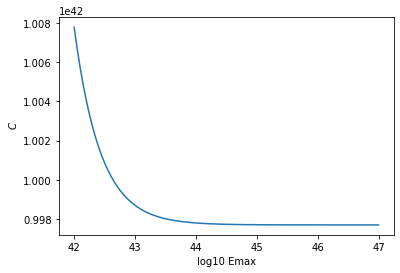

In [36]:
ax = sns.lineplot(x=np.log10(Emaxs), y=Cmaxs)
ax.set_xlabel('log10 Emax')
ax.set_ylabel(r' $C$')

Text(0, 0.5, ' $\\Delta \\, LL$')

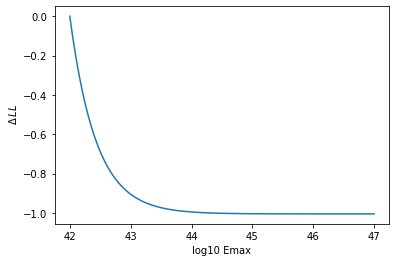

In [37]:
ax = sns.lineplot(x=np.log10(Emaxs), y=LLs - np.max(LLs))
ax.set_xlabel('log10 Emax')
ax.set_ylabel(r' $\Delta \, LL$')

### Clearly $\Delta LL$ is small (less than 1!) for all Emax values and there is no preference beyond 1e45.

### This follows our intuition..

----

# Alternative approach

## $\ln \mathcal{L} = \ln p_n(N) + \sum\limits_j^{N} \ln p_j(E)$

## with $p_j(E)$ normalized to unity

## As with the FRBs, we will assume we have another normlization constant (not $C$) that we can tune to given $N$ events.

## Therefore, we can always maximize $p_n(N)$

In [29]:
def norm_pE(Eth, Emax, gamma):
    norm = (Emax**(1+gamma) - Eth**(1+gamma))/(1+gamma)
    return norm

In [38]:
LLs2 = []
#Emaxs = 10**(np.linspace(42., 47., 100))
Cmaxs = []

for Emax in Emaxs:
    #
    norm = norm_pE(Eth, Emax, gamma)
    #print(guessC, Cvals[np.argmax(LL_C)])
    pE = df.E**gamma / norm
    #
    LLs2.append(np.sum(np.log(pE)))
LLs2 = np.array(LLs2)
#Cmaxs = np.array(Cmaxs)

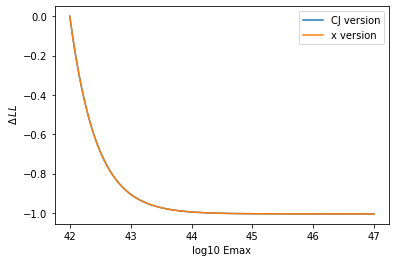

In [40]:
ax = sns.lineplot(x=np.log10(Emaxs), y=LLs2 - np.max(LLs2), label='CJ version')
ax = sns.lineplot(x=np.log10(Emaxs), y=LLs - np.max(LLs), label='x version')
ax.set_xlabel('log10 Emax')
ax.set_ylabel(r' $\Delta \, LL$')
ax.legend()